# EMAIL SPAM DETECTION WITH MACHINE LEARNING

Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

# Load and Preprocess Data

In [3]:
import pandas as pd

# Specify the correct encoding
data = pd.read_csv("C:/Users/Dell/Desktop/Internship/Oasis_Infobyte/DS/spam.csv", encoding='latin1')


import chardet

# Detect the encoding
with open("C:/Users/Dell/Desktop/Internship/Oasis_Infobyte/DS/spam.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Read the file using the detected encoding
data = pd.read_csv("C:/Users/Dell/Desktop/Internship/Oasis_Infobyte/DS/spam.csv", encoding=result['encoding'])

# Display the first few rows of the dataframe
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Since we have only two meaningful columns, let's select them correctly
# Assuming the first two columns contain the labels and text messages
data = data.iloc[:, :2]  # Adjust this based on the actual structure if different

# Rename columns for convenience
data.columns = ['label', 'text']

In [5]:
# Encode the labels: spam = 1, ham = 0
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Display the first few rows to verify changes
print(data.head())


   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


# Visualize Class Distribution

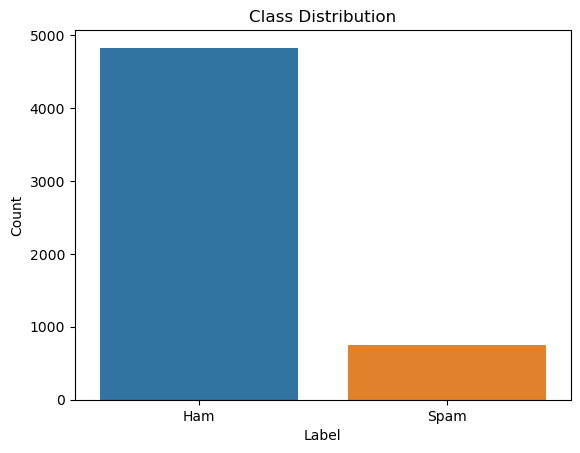

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


# Feature Extraction and Model Training

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transform the text data into TF-IDF features
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.979372197309417
Precision: 0.9703703703703703
Recall: 0.8733333333333333
F1-score: 0.9192982456140351


# Plot TF-IDF Feature Importance

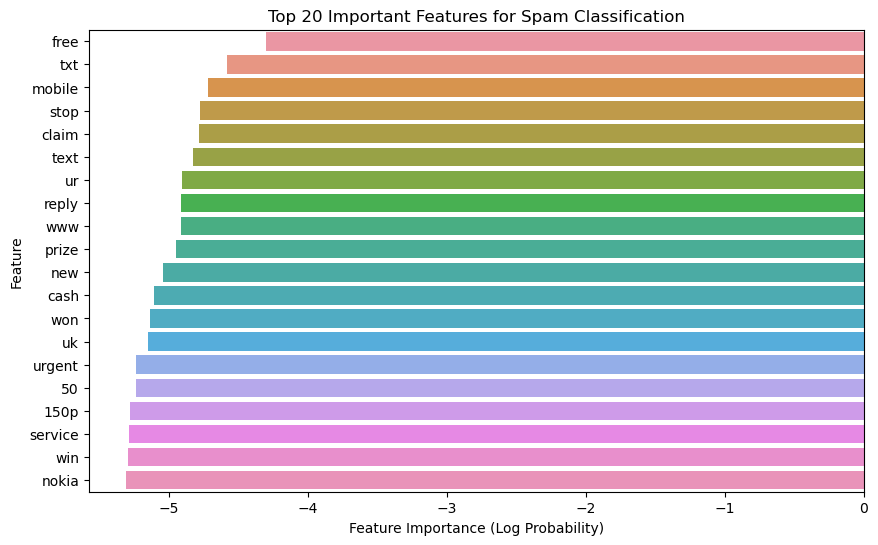

In [10]:
# Get the top features
feature_names = vectorizer.get_feature_names_out()
spam_log_prob = model.feature_log_prob_[1]
top_features = pd.DataFrame({'feature': feature_names, 'importance': spam_log_prob})
top_features = top_features.sort_values(by='importance', ascending=False).head(20)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 20 Important Features for Spam Classification')
plt.xlabel('Feature Importance (Log Probability)')
plt.ylabel('Feature')
plt.show()


# Plot Confusion Matrix

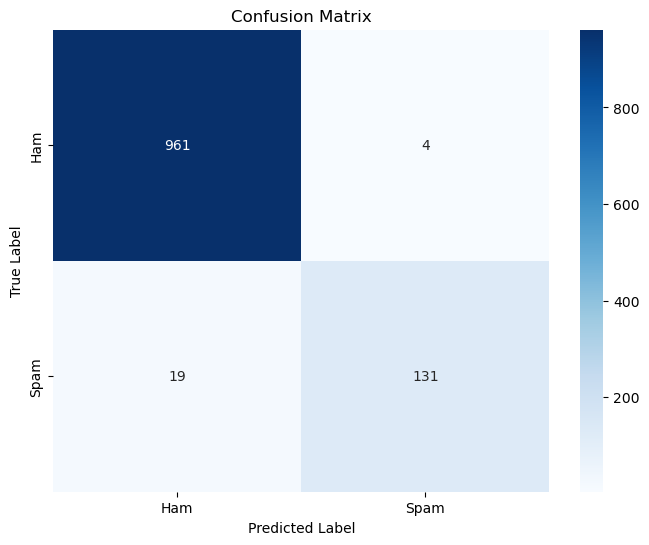

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

